# Imports
---

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Data
---




In [ ]:
# Load the data and split
data = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)

In [ ]:
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# We might need the sapes
N, D = X_train.shape

# Model
---

In [ ]:
# Build the model
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Input((D,)),
                                    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

# Evaluate the model
print('Train score: ', model.evaluate(X_train, y_train))
print('Test score: ', model.evaluate(X_test, y_test))

Epoch 1/100
12/12 [==============================] - 0s 14ms/step - loss: 0.6750 - accuracy: 0.6142 - val_loss: 0.6326 - val_accuracy: 0.6330
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 0.6105 - accuracy: 0.6982 - val_loss: 0.5667 - val_accuracy: 0.6755
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 0.5569 - accuracy: 0.7559 - val_loss: 0.5124 - val_accuracy: 0.7553
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 0.5106 - accuracy: 0.8110 - val_loss: 0.4690 - val_accuracy: 0.7979
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 0.4741 - accuracy: 0.8399 - val_loss: 0.4319 - val_accuracy: 0.8351
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: 0.4411 - accuracy: 0.8399 - val_loss: 0.4024 - val_accuracy: 0.8777
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: 0.4139 - accuracy: 0.8661 - val_loss: 0.3776 - val_accuracy: 0.8989
Epoch 8/100


# Loss per iteration
---

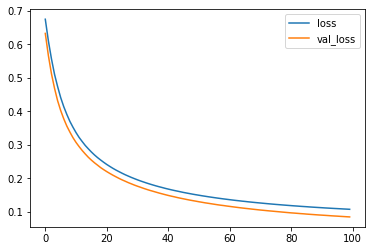

In [ ]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

# Accuracy per iteration
---

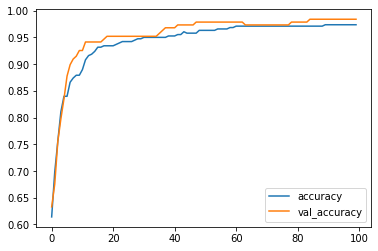

In [ ]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

# Predictions
---

In [ ]:
# Make predictions
P = model.predict(X_test)
print(P) # they are outputs of the sigmoid, interpreted as probabilities p(y=1 | x)

In [ ]:
# Round to get actual predictions
# Note: has to be flattened since the targets are size (N,) while the predictions are size (N, 1)
import numpy as np
P = np.round(P).flatten()
print(P)

[1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1.
 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1.
 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1.
 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0.
 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0.]


In [ ]:
# Calculate the accuracy
print('Manually calculated accuracy: ', np.mean(P == y_test))
print('Evaluate output: ', model.evaluate(X_test, y_test))

Manually calculated accuracy:  0.9840425531914894
6/6 [==============================] - 0s 2ms/step - loss: 0.0844 - accuracy: 0.9840
Evaluate output:  [0.08440230041742325, 0.9840425252914429]


# Saving and Loading Models
---

In [13]:
# Lets now save our model to a file
model.save('linearclassifier.h5')

In [14]:
# Check that the model file exists
!ls

linearclassifier.h5  sample_data


In [15]:
# Lets load the model and confirm that it still works
model = tf.keras.models.load_model('linearclassifier.h5')
print(model.layers)
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.0844 - accuracy: 0.9840


[0.08440230041742325, 0.9840425252914429]